# Simulation Analysis 

## Experiment: Upset Probablity vs Escalating Sample Size
For the Maine Govenor's race study the effect of sample size on upset probability for an RCV election.
The winner was: Mills, Janet T.
In the final round of the election the ballots were:
    Cote, Adam Roland: 53866
    Mills, Janet T.: 63387

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [102]:
filename = "audit_simulations_vs_2_seed_1_to_1000.csv"
df = pd.read_csv(filename)
df.__delitem__('Unnamed: 0')

In [103]:
winner = 'Mills, Janet T.'
df['upset_probability'] = 1 - df[winner]

In [104]:
df.describe()

,"Cote, Adam Roland","Dion, Donna J.","Dion, Mark N.","Eves, Mark W.","Mills, Janet T.","Russell, Diane Marie","Sweet, Elizabeth A.",Write-in,sample_size,seed,time_delta,upset_probability
count,30000.000000,30000.0,30000.0,30000.000000,30000.000000,30000.0,30000.000000,29909.0,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.044767,0.0,0.0,0.000999,0.952473,0.0,0.001761,0.0,1550.000000,500.500000,0.001528,0.047527
std,0.127651,0.0,0.0,0.013986,0.133795,0.0,0.018504,0.0,865.558571,288.679802,0.000815,0.133795
min,0.000000,0.0,0.0,0.000000,0.001000,0.0,0.000000,0.0,100.000000,1.000000,0.000129,0.000000
25%,0.000000,0.0,0.0,0.000000,0.985000,0.0,0.000000,0.0,800.000000,250.750000,0.000834,0.000000
50%,0.000000,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.0,1550.000000,500.500000,0.001530,0.000000
75%,0.014000,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.0,2300.000000,750.250000,0.002201,0.015000
max,0.998000,0.0,0.0,0.640000,1.000000,0.0,0.697000,0.0,3000.000000,1000.000000,0.007838,0.999000


Text(0,0.5,'Sample Size')

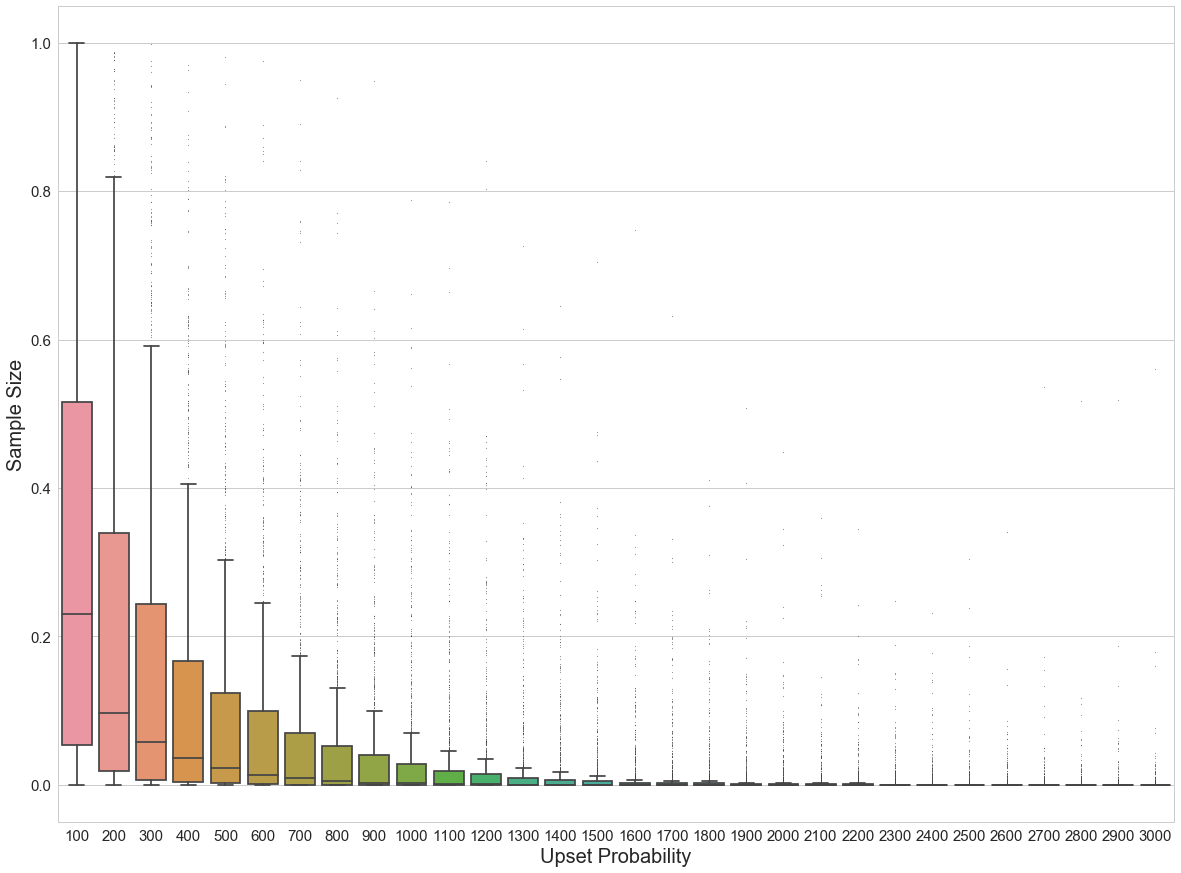

In [105]:
# Box plot as described: https://en.wikipedia.org/wiki/Box_plot 
sns.set(font_scale=1.5) 
plt.figure(figsize=(20, 15))
sns.set_style('whitegrid')
ax = sns.boxplot(x='sample_size',y='upset_probability', data=df,fliersize=1)
ax.set_xlabel("Upset Probability",fontsize=20)
ax.set_ylabel("Sample Size",fontsize=20)

In [110]:
sample_size_upset_df = df[df['sample_size']==100][['seed']]
for sample_size in df.sample_size.unique():
    sample_df = df[df['sample_size']==sample_size][['seed','upset_probability']]
    sample_df= sample_df.rename(index=str, columns={ 'upset_probability':"upset_probability_sample_%d"%sample_size})
    sample_size_upset_df = sample_size_upset_df.join(sample_df.set_index('seed'),on='seed')

In [112]:
sample_size_upset_df.describe()

,seed,upset_probability_sample_100,upset_probability_sample_200,upset_probability_sample_300,upset_probability_sample_400,upset_probability_sample_500,upset_probability_sample_600,upset_probability_sample_700,upset_probability_sample_800,upset_probability_sample_900,...,upset_probability_sample_2100,upset_probability_sample_2200,upset_probability_sample_2300,upset_probability_sample_2400,upset_probability_sample_2500,upset_probability_sample_2600,upset_probability_sample_2700,upset_probability_sample_2800,upset_probability_sample_2900,upset_probability_sample_3000
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.310917,0.220792,0.172261,0.128808,0.104029,0.084012,0.067538,0.054177,0.046259,...,0.005554,0.004487,0.003666,0.003307,0.003073,0.002517,0.002420,0.002011,0.002084,0.001839
std,288.819436,0.287108,0.264765,0.237921,0.192189,0.174977,0.148627,0.130040,0.110068,0.101207,...,0.025869,0.020844,0.016679,0.015860,0.017410,0.014941,0.020084,0.018211,0.019083,0.019836
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,250.750000,0.054000,0.019000,0.007000,0.004000,0.002000,0.001000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,500.500000,0.230000,0.097000,0.058000,0.035500,0.022000,0.013000,0.009000,0.005000,0.003000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,750.250000,0.516000,0.339250,0.243750,0.167000,0.123000,0.099000,0.069250,0.052000,0.040000,...,0.001000,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1000.000000,0.999000,0.988000,0.998000,0.970000,0.981000,0.975000,0.950000,0.925000,0.948000,...,0.360000,0.344000,0.247000,0.231000,0.304000,0.341000,0.536000,0.517000,0.519000,0.560000
